## Import All Necessary Packages

In [1]:
import os
import json
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
# Setup Figure size
fig_size = [164,196]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['figure.dpi'] = 350

#### A function to take raw range data like [16.1-17.2] and return a valid range like 16.1-17.2

In [2]:
def format_range(range_data):
    x=range_data
    x = x.replace("[", '')
    x = x.replace("]", '')
    return x   

#### Read The File And Set the variables and objects

In [3]:
with open('WHOSIS_MDG_000003.csv') as f:
    raw_data = f.readlines()

#Remove the first row
headers = raw_data.pop(0)

data = {}

#### Format data

Create the data in list term with the following format

###### [country,  year, infantMotralityRate, InfantMortalityConfidence, neonatalMotalityRate, NeonatalMortalityConfidence, underFiveMotalityRate, UnderFiveMortalityConfidence}

In [4]:
fulltable = []
for line in raw_data:
    items = line.strip().split(',')
    country = items[0]
    year = items[1]
    infant = items[2]
    infant_rate = infant.split(' ')[0]
    infant_confidence = infant.split(' ')[1]
    neonatal = items[3]
    neonatal_rate = neonatal.split(' ')[0]
    neonatal_confidence = neonatal.split(' ')[1]
    under_five = items[4]
    under_five_rate = under_five.split(' ')[0]
    under_five_confidence = under_five.split(' ')[1]
    line_data = [
        country, int(year), float(infant_rate), format_range(infant_confidence), float(neonatal_rate), 
        format_range(neonatal_confidence), float(under_five_rate), format_range(under_five_confidence)
    ]
    fulltable.append(line_data)
    

### Create A reusable function for plotting the bar graphs

Calling the function should be something like 
`plot_bar(under5_2015, title="Mortality Rate For Under5 In 2015")`

In [5]:
def plot_bar(data, title):
    # Get The under 5 mortality rate as a list
    y_axis = [i[6] for i in data]
    # Get The Country names as Labels
    x_labels = [i[0] for i in data]
    index = np.arange(len(x_labels))
    plt.bar(index, y_axis, width=0.8)
    plt.xlabel('Country', fontsize=15)
    plt.ylabel('Mortality', fontsize=15)
    plt.xticks(index, x_labels, fontsize=15, rotation=40)
    plt.title(title, fontsize=20)
    plt.show()

### Under Five mortality in 1990

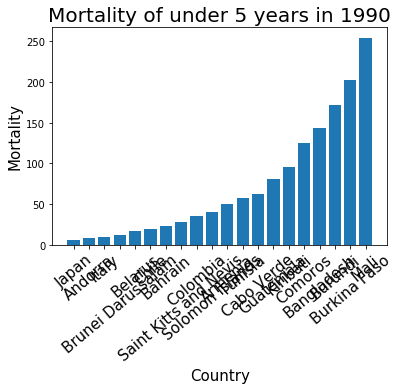

In [6]:
under5_1990 = []
for line in fulltable:
    if line[1] == 1990:
        under5_1990.append(line)
        
#Sort from small to lagest value or under 5 mortality 
under5_1990 = sorted(under5_1990, key=itemgetter(6))

# Pick Tenth elements 
under5_1990 = under5_1990[::10]
# under5_2015
plot_bar(under5_1990, 'Mortality of under 5 years in 1990')

Start plotting

### Under 5 mortality 2015

In [7]:
under5_2015 = []
for line in fulltable:
    if line[1] == 2015:
        under5_2015.append(line)
        
#Sort from small to lagest value or under 5 mortality 
under5_2015 = sorted(under5_2015, key=itemgetter(6))

# Pick Tenth elements 
under5_2015 = under5_2015[::10]

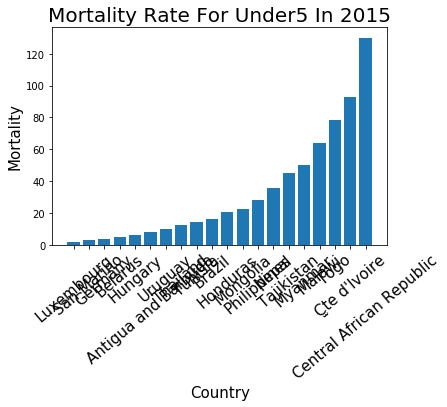

In [8]:
plot_bar(under5_2015, title="Mortality Rate For Under5 In 2015")

## Trends in under 5 mortality in Bahamas, Egypt and Germany

In [9]:
bahamas_data=[]
germany_data = []
egypt_data = []
for line in fulltable:
    if line[0] == 'Bahamas':
        bahamas_data.append(line)
    if line[0] == 'Germany':
        germany_data.append(line)
    if line[0] == 'Egypt':
        egypt_data.append(line)

# Sort the values
bahamas_data = sorted(bahamas_data, key=itemgetter(1))
germany_data = sorted(germany_data, key=itemgetter(1))
egypt_data = sorted(egypt_data, key=itemgetter(1))


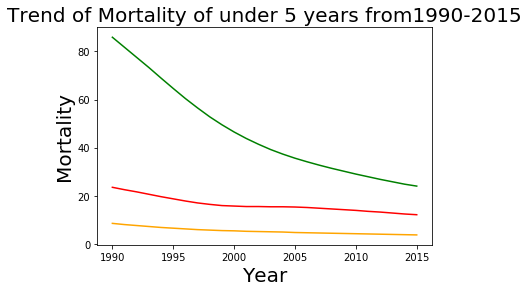

In [10]:
plt.plot([i[1] for i in bahamas_data], [i[6] for i in bahamas_data], color="red", label="Bahamas")
plt.plot([i[1] for i in germany_data], [i[6] for i in germany_data], color="orange", label="Germany")
plt.plot([i[1] for i in egypt_data], [i[6] for i in egypt_data], color="green", label="Egypt")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Mortality', fontsize=20)
plt.title('Trend of Mortality of under 5 years from1990-2015', fontsize=20)
plt.show()

## The reduction in under-five mortality rates over the 1990/2015

In [11]:
bahamas1990=bahamas_data[0][6]
bahamas2015 = bahamas_data[-1][6]
bahamas_reduction = bahamas2015/bahamas1990

egypt1990=egypt_data[0][6]
egypt2015 = egypt_data[-1][6]
egypt_reduction = egypt2015/egypt1990

germany1990=germany_data[0][6]
germany2015 = germany_data[-1][6]
germany_reduction = germany2015/germany1990

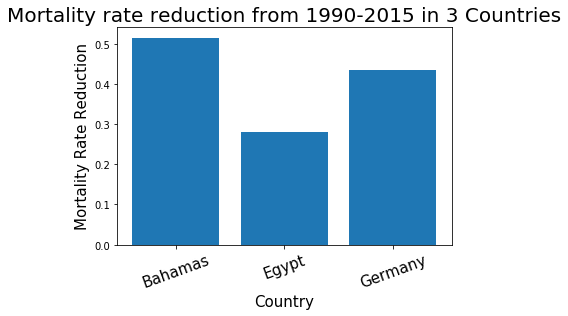

In [12]:
labels = ['Bahamas', 'Egypt', 'Germany']
reductions = [bahamas_reduction, egypt_reduction, germany_reduction]

y_axis = reductions
# Get The Country names as Labels
index = np.arange(len(labels))
plt.bar(index, y_axis, width=0.8)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Mortality Rate Reduction', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=20)
plt.title("Mortality rate reduction from 1990-2015 in 3 Countries", fontsize=20)
plt.show()

## Under-five mortality graph of my choice

#### MORTALITY RATE OF SOME OF THE LARGE COUNTRIES AND SMALLEST ECCONOMIES IN 2015

In [13]:
#United States of America
my_data=[]
selected_countries = ['Germany', 'China', 'Japan', 'Malawi',
                      'Zimbabwe']
for item in fulltable:
    if item[1] == 2015:
        if item[0] in selected_countries:
            my_data.append(item)

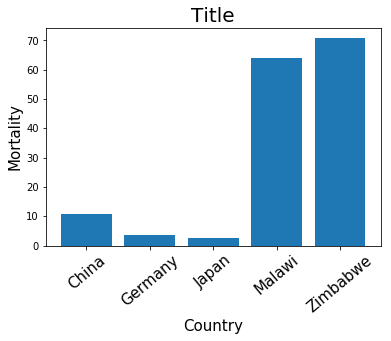

In [14]:
plot_bar(my_data, title='Title')

From the graph, third world counteries have the highest mortality rate